In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
width = 500
height = 400

In [16]:
color_mode = np.random.choice(['RGB', 'grayscale'])

In [17]:
def generate_noise(color_mode):
  if color_mode == 'RGB':
    return np.random.randint(low=0, high=256, size=(height, width, 3), dtype=np.uint8)
  else:
    return np.random.randint(low=0, high=256, size=(height, width), dtype=np.uint8)

In [18]:
image_data = generate_noise(color_mode)

In [19]:
def add_random_shapes(image_data, num_shapes=10):
  for _ in range(num_shapes):
    shape_type = np.random.choice(['circle', 'rectangle'])
    if shape_type == 'circle':
      x, y = np.random.randint(low=0, high=image_data.shape[0:2], size=2)
      radius = np.random.randint(low=10, high=50)
      mask = (np.ogrid[y-radius:y+radius+1, x-radius:x+radius+1] ** 2).sum(axis=0) <= radius**2
      color = np.random.randint(low=0, high=256 if color_mode == 'RGB' else 1, size=3 if color_mode == 'RGB' else 1)
      image_data[mask] = color
    else:
      x1, y1 = np.random.randint(low=0, high=image_data.shape[0:2], size=2)
      width = np.random.randint(low=10, high=100)
      height = np.random.randint(low=10, high=100)
      x2, y2 = x1 + width, y1 + height
      mask = (np.arange(image_data.shape[0])[:, np.newaxis] >= y1) & (np.arange(image_data.shape[0])[:, np.newaxis] < y2) & \
             (np.arange(image_data.shape[1]) >= x1) & (np.arange(image_data.shape[1]) < x2)
      color = np.random.randint(low=0, high=256 if color_mode == 'RGB' else 1, size=3 if color_mode == 'RGB' else 1)
      image_data[mask] = color


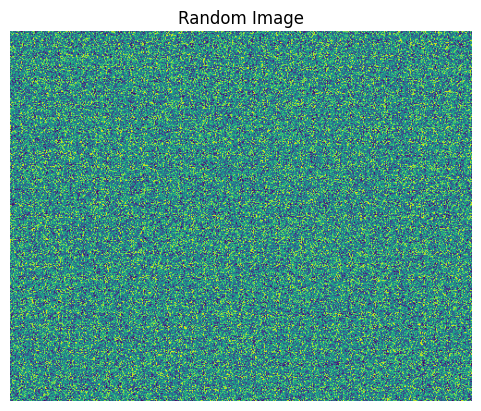

In [20]:
plt.imshow(image_data)
plt.axis("off")
plt.title("Random Image")
plt.show()